C:\Users\Admin\AppData\Local\Temp\ipykernel_18424\1946175948.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')



Kernel: linear
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 1]
 [1 1]]


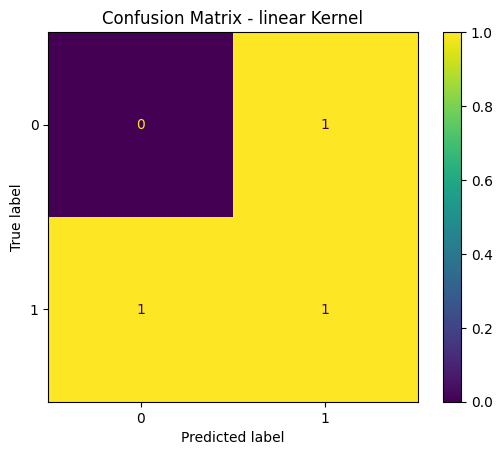


Kernel: rbf
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[1 0]
 [2 0]]


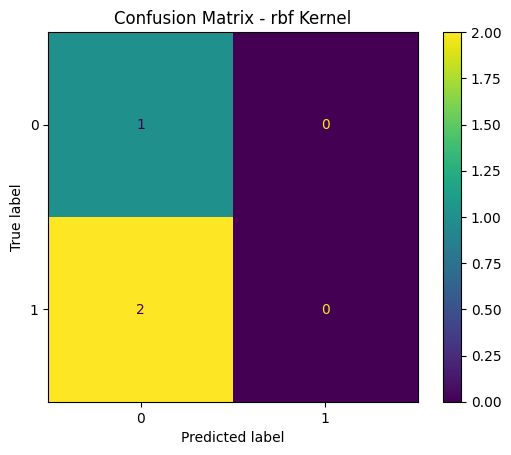


Kernel: poly
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[1 0]
 [2 0]]


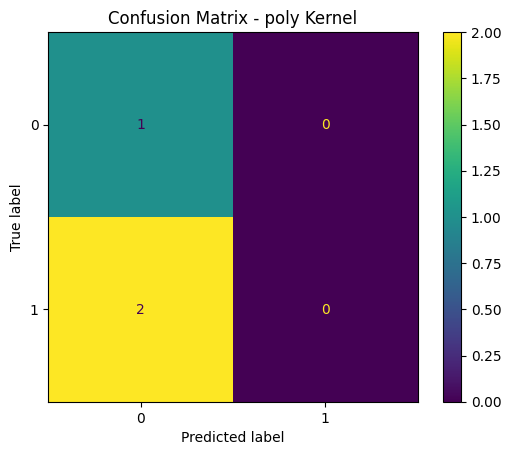


Kernel: sigmoid
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]


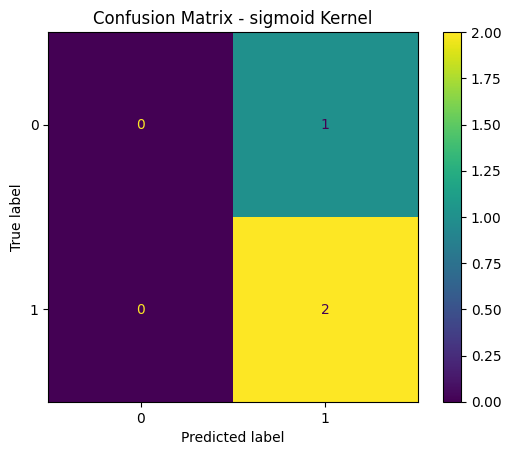

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('ML Dataset/Decision Tree & Naive Bayes Classification/data.csv')

# Fill missing values
data = data.fillna(method='ffill')

# Encode categorical columns
le = LabelEncoder()
for cols in data.columns:
    if data[cols].dtype == 'object':
        data[cols] = le.fit_transform(data[cols])

# Split data into features and target
X = data.drop(['Go'], axis=1)
y = data['Go']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different kernels
kernal_functions = ['linear', 'rbf', 'poly','sigmoid']
for kernel in kernal_functions:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    dsp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    dsp.plot()
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.show()
